In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
file_path = '/content/bank.csv'

In [4]:
dados = pd.read_csv(file_path, sep=';')

In [5]:
dados.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
fig = px.histogram(dados, x='age')
fig.update_layout(title_text='Distribuição de Idades')
fig.show()

Temos um gráfico enviesado para a esquerda, ou seja a maioria dos clientes do banco estão proxímos do 20, principalmente entre 30 e 40 anos de idade

In [7]:
fig = px.bar(dados, x = 'job',category_orders={'job': dados['job'].value_counts().index})
fig.update_layout(
    title_text = 'Distribuição de Profissões',
    xaxis_title = 'Profissão',
    yaxis_title = 'Quantidade'

)
fig.show()

Colocando as barras em ordem decrescente, podemos ver que a maioria dos clientes são gerentes ou da área de gerencia, já a segunda categoria é o blue-collar, que seria algo como trabalhadores braçais ou algo do tipo, basicamente profissões que usa mais esforço fisíco, e em seguida vem técnicos. São as três áreas de trabalho que mais aparecem no nosso dataset

In [8]:
fig = px.bar(dados, x = 'contact')
fig.update_layout(
    title_text = 'Distribuição de formas de contato',
    xaxis_title = 'Contato',
    yaxis_title = 'Quantidade'
)

A maioria das pessoas são contadas via celular, mas o que chama a atenção é o fato da segunda maior forma de contato ser desconhecida, pode ser algum erro do dataset, ou importação errado do banco de dados, dado que isso não é comum

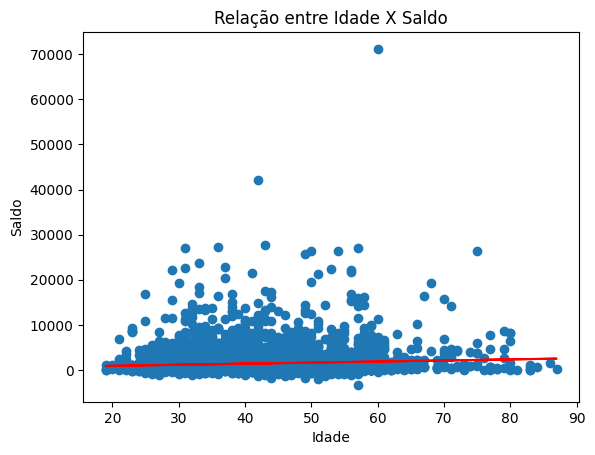

In [9]:
plt.scatter(x = dados['age'], y = dados['balance'])
plt.title('Relação entre Idade X Saldo')
plt.xlabel('Idade')
plt.ylabel('Saldo')

#colocando a reta de regressão linear

x = dados['age']
y = dados['balance']

a , b = np.polyfit(x, y, 1)
plt.plot(x, a*x + b, color = 'red')
plt.show()

Não parecer existir uma relação tão forte entre idade e saldo bancário, a nossa reta de regressão tem uma inclinação quase 0

In [10]:
dados2 = dados.groupby('default')['balance'].mean()
fig = px.bar(dados2, x = dados2.index, y = dados2.values)
fig.update_layout(
    title_text = 'Relação entre Inadimplência e Saldo',
    xaxis = dict(ticktext = ['Não Inadimplente','Inadimplente'],tickvals = dados2.index )
    ,)
fig.show()

De maneira bem clara é possível ver que as pessoas que são inadimplentes tem um saldo bancário negativo, o que era esperado, enquantos as pessoas não indadimplentes tem um saldo positivo e até bastante alto

In [11]:
dados3 = dados.groupby('housing')['balance'].mean()
fig = px.bar(dados3, dados3.index, dados3.values)
fig.update_layout(
    title_text = 'Relação entre ter casa e Saldo',
    )

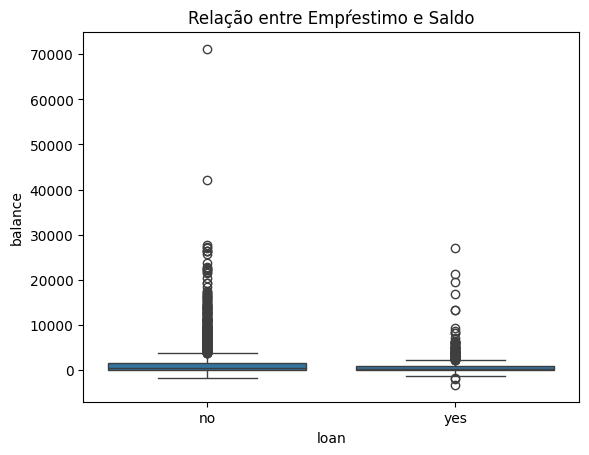

In [12]:
sns.boxplot(x = 'loan', y = 'balance', data = dados)
plt.title('Relação entre Empŕestimo e Saldo')
plt.show()

O gráfico de boxplot não ficou tão legal, pela grande quantidade de outlier, então pode ser interessante testar um tipo diferente de gráfico que nos ajude a entender melhor essa correlação


In [13]:
dados4 = dados.groupby('loan')['balance'].mean()
fig = px.bar(dados4, x = dados4.index, y = dados4.values)
fig.update_layout(
    title_text = 'Relação entre Empréstimo e Saldo',
   xaxis = dict(ticktext = ['Não Emprestado','Emprestado'],tickvals = dados['loan'].value_counts().index),
    )
fig.show()

As pessos que não tem o empréstimo aprovado, são as que possuem o saldo maior, talvez justamente por ter um historico de empréstimo e com as parcelas em dia, acaba que no final o seu saldo acaba sendo menor que as pessoas que não tem o empréstimo aprovado, já que essas pessoas não tem dívidas ou empréstimo para pagar

In [14]:
fiq = dados['balance'].quantile(0.75) - dados['balance'].quantile(0.25)

min = dados['balance'].quantile(0.25) - 1.5*fiq
max = dados['balance'].quantile(0.75) + 1.5*fiq

dados['outliers_balance'] = 'no'
dados.loc[dados['balance'] < min, 'outliers_balance'] = 'yes'
dados.loc[dados['balance'] > max, 'outliers_balance'] = 'yes'

In [15]:
dados['outliers_balance'].value_counts()

,count
outliers_balance,
no,4015
yes,506


In [16]:
dados5 = dados.loc[dados['outliers_balance']=='yes', :]
dados6 = dados.loc[dados['outliers_balance']=='no', :]
dados5.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,outliers_balance
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,yes
10,39,services,married,secondary,no,9374,yes,no,unknown,20,may,273,1,-1,0,unknown,no,yes
16,56,technician,married,secondary,no,4073,no,no,cellular,27,aug,239,5,-1,0,unknown,no,yes
25,41,management,married,tertiary,no,5883,no,no,cellular,20,nov,182,2,-1,0,unknown,no,yes
30,68,retired,divorced,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes,yes


In [17]:
fig1 = px.histogram(dados5, x='age')
fig1.update_layout(title_text='Distribuição de Idades dos clientes que são outliers')
fig1.show()

fig2 = px.histogram(dados6, x='age')
fig2.update_layout(title_text='Distribuição de Idades dos clientes que não são outliers')
fig2.show()

As duas distribuição são bem parecida, para os dois tipos de clientes, ambas são envisada pra esquerda

In [18]:
dados5
dados5['yes'] = dados5['y'].replace({'yes':1,'no':0}, inplace = True)
dados6['yes'] = dados6['y'].replace({'yes':1,'no':0}, inplace = True)

<ipython-input-18-8409838a91d1>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-18-8409838a91d1>:2: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-18-8409838a91d1>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [19]:
dados5.groupby('month')['y'].mean()

,y
month,
apr,0.289474
aug,0.140845
dec,0.333333
feb,0.333333
jan,0.400000
jul,0.102564
jun,0.054795
mar,0.454545
may,0.090909


Para os outlier durante o inicio do ano, entre os meses de janeiro e março, parece que existe uma possibilidade maior de ter um empréstimo aprovado, com destaque para março, talvez por ser o mês que a rotina volta ao normal, fim das ferías de final de ano,e existem pagamenos sazonais como IPTU e IPVA, e por conta disso talvez o banco fique mais pŕopricio a liberar empréstimo, já no meses do meio e fim do ano, a chance são bem mais baixas, com excesão de setembro

In [20]:
dados6.groupby('month')['y'].mean()

,y
month,
apr,0.176471
aug,0.122776
dec,0.500000
feb,0.156863
jan,0.086957
jul,0.085457
jun,0.111354
mar,0.421053
may,0.064213


Já para os não outlier, as melhores chances de ter um empréstimo são, no final do ano, mais especificamente entre setembro, outubro e dezembro, e em março, que parece ser um padrão pra tanto para os outliers quanto para os não outliers

In [21]:
dados['y'] = dados['y'].replace({'yes':1,'no':0})

<ipython-input-21-e551f1ae6f18>:1: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [22]:
dados7 = dados.groupby('default')['y'].mean()
fig = px.bar(dados7, x = dados7.index, y = dados7.values)
fig.update_layout(
    title_text = 'Relação entre Indimplencia e Empréstimo',
    xaxis = dict(ticktext = ['Inadimplente','Não Inadimplente'],tickvals = dados['default'].value_counts().index)
)
fig.update_yaxes(range = [0,1,])
fig.show()

In [23]:
dados8 = dados.groupby('housing')['y'].mean()
fig = px.bar(dados8, x = dados8.index, y = dados8.values)
fig.update_layout(
    title_text = 'Relação entre Casa e Empréstimo',
    xaxis = dict(ticktext = ['Possui hipoteca','Não possui Hipoteca'],tickvals = dados['housing'].value_counts().index)
)
fig.show()

É possível ver que, para aqueles que não possuem hipoteca a chance de obter um empréstimo do banco é bem maior, já que hipotecas costuam ser valores mensais significantes, é natural que o banco fique com o pé atras na hora de empresta

In [24]:
#numericas features
dados10 = dados.select_dtypes(include = np.number)
dados10.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


<Axes: >

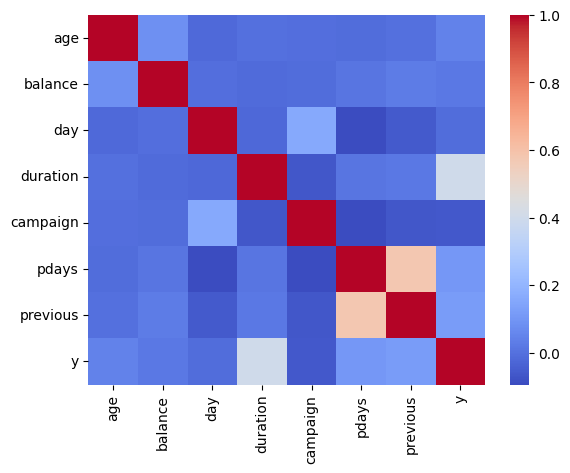

In [25]:
sns.heatmap(dados10.corr(), cmap = 'coolwarm')

Olhando a correlação entre os valores númericos, todos tem uma correlação baixa entre si, e também com a varíavel target que é o Y, todas ficam entre 0.0 e 0.3

In [26]:
dados.groupby(['outliers_balance','housing'])['y'].mean()

outliers_balance  housing
no                no         0.148949
                  yes        0.084238
yes               no         0.184000
                  yes        0.101562
Name: y, dtype: float64

In [31]:
#retorna todos os dados da coluna y que atendem a nossa condição
proba0 = dados.loc[dados['previous']==0,'y'].mean()
proba1 = dados.loc[dados['previous']==1,'y'].mean()
print(f'Probabilidade de receber o empréstimo, dado que o banco nunca entrou em contato: {proba0:.2f}')
print(f'Probabilidade de receber o empréstimo, dado que o banco entrou em contato: {proba1:.2f}')

Probabilidade de receber o empréstimo, dado que o banco nunca entrou em contato: 0.09
Probabilidade de receber o empréstimo, dado que o banco entrou em contato: 0.18


A probabilidade de obter um empréstimo é duas vezes maior quando o banco já realizou um contato prévio, em comparação a casos em que não houve tentativa anterior.